In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset with semicolon delimiter
file_path = 'bank-full.csv' 
bank_data = pd.read_csv(file_path, sep=';')

In [3]:
# Save the DataFrame to a new CSV file
output_file_path = 'bank_full_output.csv'  
bank_data.to_csv(output_file_path, index=False)

print(f"File has been saved to {output_file_path}")

File has been saved to bank_full_output.csv


In [4]:
#first 5 rows of the dataset
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#last 5 rows of the dataset
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
# no of rows and columns in the dataset
bank_data.shape

(45211, 17)

In [7]:
#no of elements in the dataset
bank_data.size

768587

In [8]:
#summary statistics of the dataset
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
#information of the dataset
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
#checking for null values
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### EDA

In [11]:
# Rename the column 'y' to 'term_deposit'
bank_data = bank_data.rename(columns={'y': 'term_deposit'})

# Verify the change
print("Updated column names:\n", bank_data.columns)

Updated column names:
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit'],
      dtype='object')


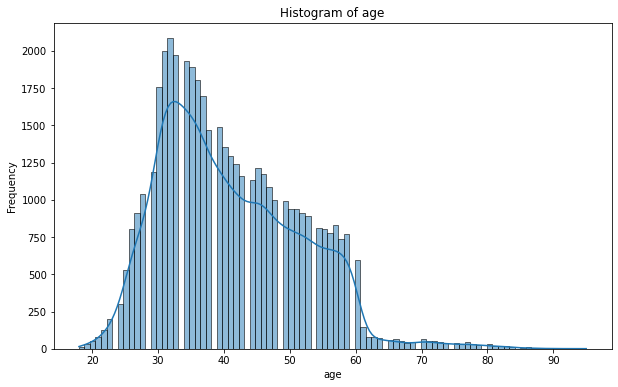

In [12]:
# Selecting one numerical column to create a histogram plot
numerical_column = "age"  

# Create the histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(data=bank_data, x=numerical_column, kde=True)
plt.title(f'Histogram of {numerical_column}')
plt.xlabel(numerical_column)
plt.ylabel("Frequency")
plt.show()

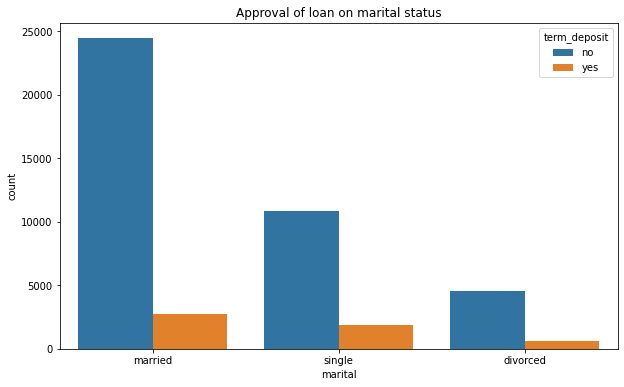

In [13]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Generate the count plot with hue for 'Obesity_Category'
sns.countplot(data=bank_data, x='marital', hue='term_deposit')
plt.title("Approval of loan on marital status")
plt.show()

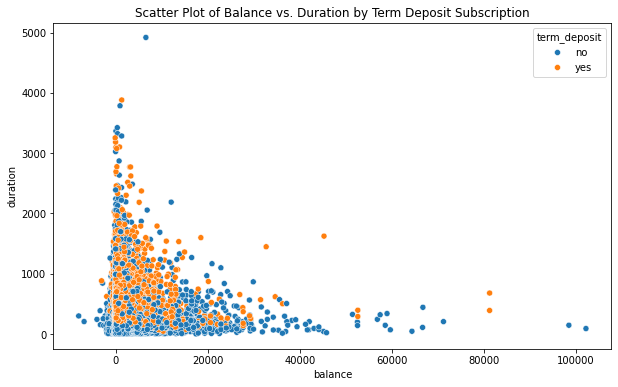

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bank_data, x='balance', y='duration', hue='term_deposit')
plt.title("Scatter Plot of Balance vs. Duration by Term Deposit Subscription")
plt.show()

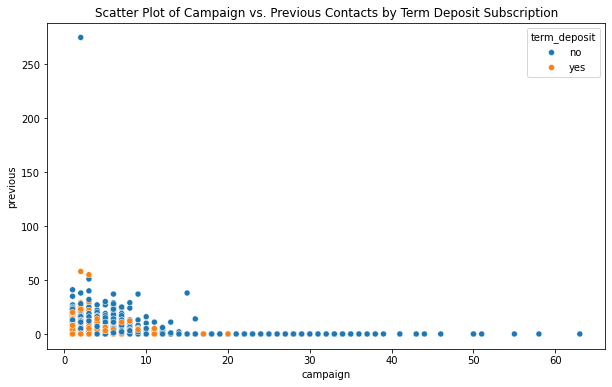

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bank_data, x='campaign', y='previous', hue='term_deposit')
plt.title("Scatter Plot of Campaign vs. Previous Contacts by Term Deposit Subscription")
plt.show()

In [16]:
%matplotlib inline

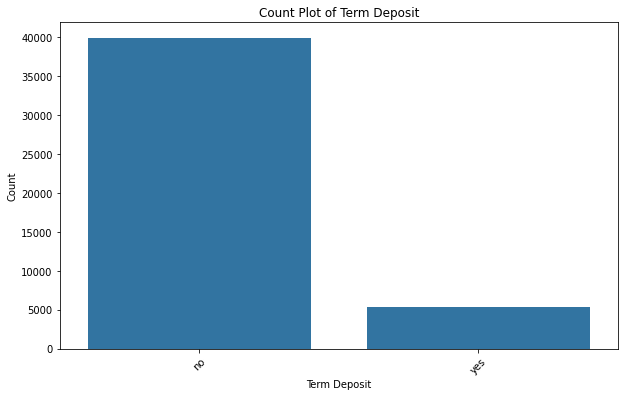

In [17]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Generate the count plot for the 'Obesity_Category' column
sns.countplot(data=bank_data, x='term_deposit')
plt.title("Count Plot of Term Deposit")
plt.xlabel("Term Deposit")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x labels for readability if needed
plt.show()

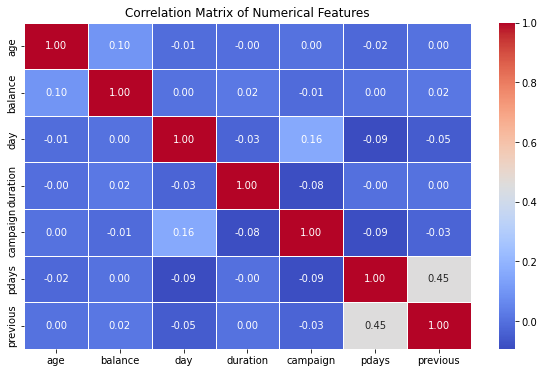

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns
numerical_data = bank_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [19]:
# Check the number of rows before removing duplicates
print("Number of rows before removing duplicates:", bank_data.shape[0])

# Drop duplicate rows
bank_data = bank_data.drop_duplicates()

# Check the number of rows after removing duplicates
print("Number of rows after removing duplicates:", bank_data.shape[0])

Number of rows before removing duplicates: 45211
Number of rows after removing duplicates: 45211


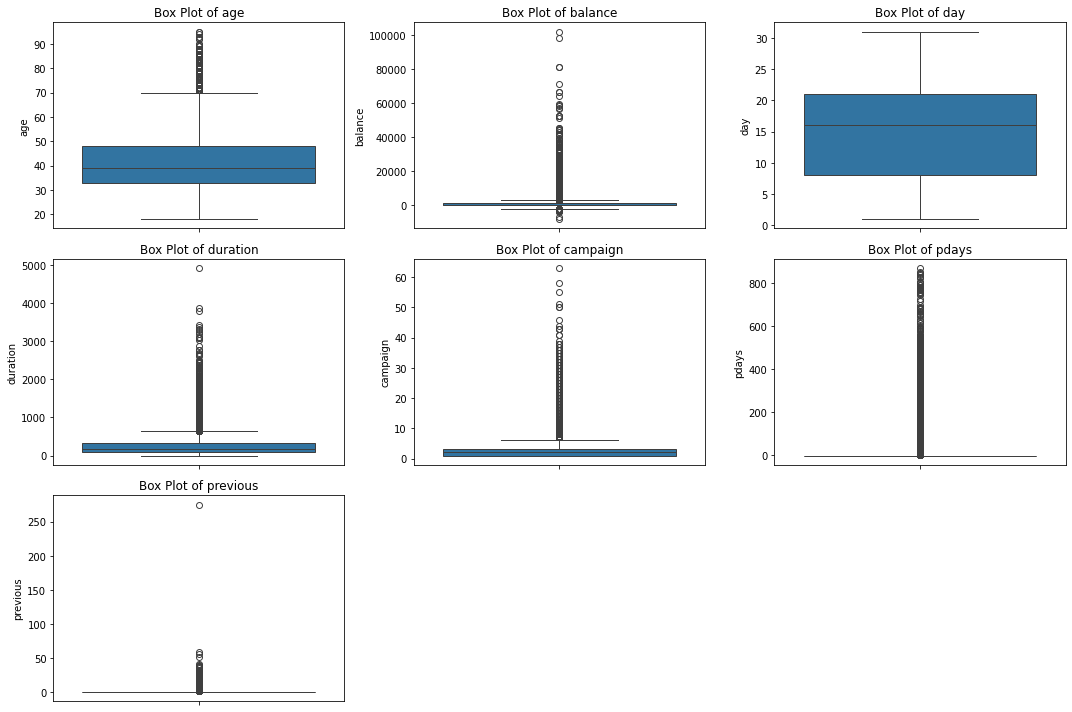

In [20]:
#checking for outliers

# Select numerical columns
numerical_data = bank_data.select_dtypes(include=['float64', 'int64'])

# Plot box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_data.columns, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size based on the number of columns
    sns.boxplot(data=numerical_data, y=column)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [21]:
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    df[column] = df[column].clip(lower_bound, upper_bound)
    
# Apply capping to selected columns
for col in ['balance', 'duration', 'campaign', 'previous']:
    cap_outliers(bank_data, col)

# Check the result
print(bank_data.describe())

                age       balance           day      duration      campaign  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210   1278.121689     15.806419    254.375993      2.691403   
std       10.618762   2249.406970      8.322476    234.779511      2.585740   
min       18.000000   -627.000000      1.000000     11.000000      1.000000   
25%       33.000000     72.000000      8.000000    103.000000      1.000000   
50%       39.000000    448.000000     16.000000    180.000000      2.000000   
75%       48.000000   1428.000000     21.000000    319.000000      3.000000   
max       95.000000  13164.900000     31.000000   1269.000000     16.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.524689  
std      100.128746      1.457817  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  


In [22]:
#converting categorical to numerical values
label_encoder = LabelEncoder()
bank_data['term_deposit'] = label_encoder.fit_transform(bank_data['term_deposit']) #converting only target column
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0.0,unknown,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0.0,unknown,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0.0,unknown,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0.0,unknown,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0.0,unknown,0


In [23]:
# One-hot encode other categorical features
bank_data = pd.get_dummies(bank_data, drop_first=True)
bank_data.head()

,age,balance,day,duration,campaign,pdays,previous,term_deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143.0,5,261,1,-1,0.0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29.0,5,151,1,-1,0.0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2.0,5,76,1,-1,0.0,0,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506.0,5,92,1,-1,0.0,0,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1.0,5,198,1,-1,0.0,0,False,False,...,False,False,False,True,False,False,False,False,False,True


In [24]:
# Define features (X) and target variable (y)
X = bank_data.drop('term_deposit', axis=1)  # Features
y = bank_data['term_deposit']               # Target

In [26]:
# Apply Min-Max Scaling to make all values non-negative
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Apply SelectKBest with the Chi-Square test
selector = SelectKBest(score_func=chi2, k=15)
X_selected = selector.fit_transform(X_scaled, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features with Chi-Square (after Min-Max Scaling):\n", selected_features)

Selected Features with Chi-Square (after Min-Max Scaling):
 Index(['duration', 'previous', 'job_blue-collar', 'job_retired', 'job_student',
       'housing_yes', 'loan_yes', 'contact_unknown', 'month_dec', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


In [28]:
#Handle Class Imbalance using SMOTE
# Apply SMOTE to the selected features and target
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X[selected_features], y)
# Print the shape of the resampled data
print("Shape of X_resampled:", X_resampled.shape)
print("Shape of y_resampled:", y_resampled.shape)

# Print the number of samples in each class after resampling
print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())

Shape of X_resampled: (79844, 15)
Shape of y_resampled: (79844,)

Class distribution after SMOTE:
term_deposit
0    39922
1    39922
Name: count, dtype: int64


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import pandas as pd

# Define the features (X) and target variable (y)
X = bank_data.drop('term_deposit', axis=1)  # Features
y = bank_data['term_deposit']               # Target variable

X = pd.get_dummies(X, drop_first=True)

In [30]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [31]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42) #random forest classifier
knn_model = KNeighborsClassifier() #KNN classifier

In [32]:
# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

In [33]:
# Define hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

In [34]:
# Use GridSearchCV for hyperparameter tuning
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy')

In [35]:
# Train the models with Grid Search
rf_grid_search.fit(X_train, y_train)
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [36]:
# Get the best models
best_rf = rf_grid_search.best_estimator_
best_knn = knn_grid_search.best_estimator_

In [37]:
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best KNN Parameters:", knn_grid_search.best_params_)

Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 100}
Best KNN Parameters: {'n_neighbors': 3, 'weights': 'distance'}


In [38]:
# Model Evaluation on Test Set
# Predictions and Evaluation for Random Forest
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7908
           1       0.88      0.92      0.90      8061

    accuracy                           0.90     15969
   macro avg       0.90      0.90      0.90     15969
weighted avg       0.90      0.90      0.90     15969

Random Forest Confusion Matrix:
[[6896 1012]
 [ 647 7414]]


In [39]:
# Predictions and Evaluation for KNN
y_pred_knn = best_knn.predict(X_test)
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      7908
           1       0.86      0.91      0.89      8061

    accuracy                           0.88     15969
   macro avg       0.88      0.88      0.88     15969
weighted avg       0.88      0.88      0.88     15969

KNN Confusion Matrix:
[[6744 1164]
 [ 704 7357]]


In [40]:
# Step 9: Visualize Confusion Matrices for both models
plt.figure(figsize=(14,6))

<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

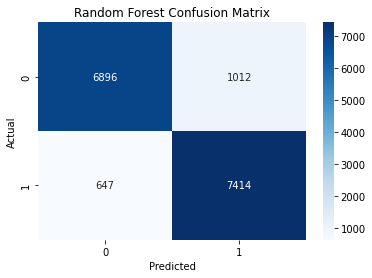

In [41]:
# Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

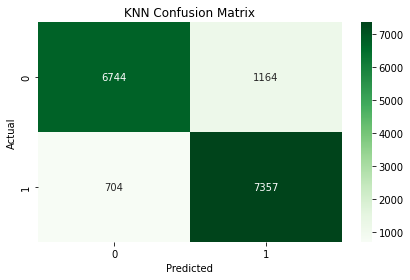

In [42]:
# KNN Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Greens")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [43]:
# Cross-Validation Accuracy Scores
rf_cv_score = cross_val_score(best_rf, X_resampled, y_resampled, cv=5, scoring='accuracy') #CV for random forest
knn_cv_score = cross_val_score(best_knn, X_resampled, y_resampled, cv=5, scoring='accuracy') #Cv for KNN

In [44]:
print("Random Forest Cross-Validation Accuracy:", rf_cv_score.mean())
print("KNN Cross-Validation Accuracy:", knn_cv_score.mean())

Random Forest Cross-Validation Accuracy: 0.7473559751791139
KNN Cross-Validation Accuracy: 0.8427428680079176


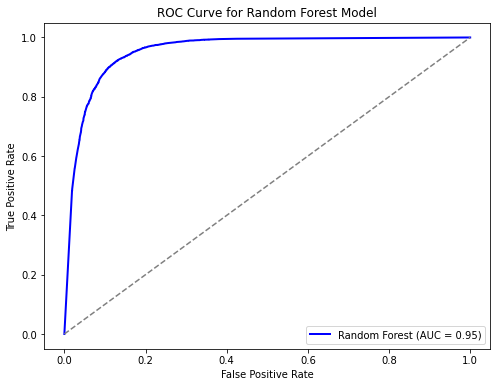

In [45]:
# Get probability predictions for the positive class (class 1) using Random Forest
y_scores_rf = best_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guess

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='lower right')
plt.show()

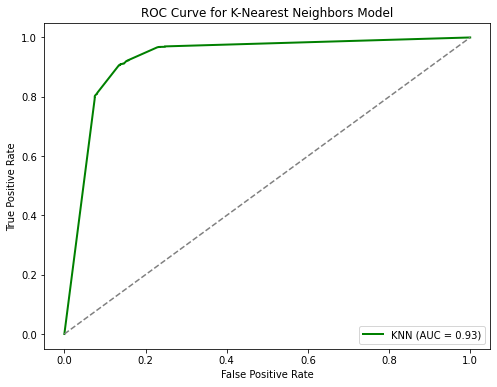

In [46]:
# Get probability predictions for the positive class (class 1) using KNN
y_scores_knn = best_knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guess

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors Model')
plt.legend(loc='lower right')
plt.show()